# 1.데이터 소개

**Bike Sharing Demand**

**데이터분석과 시각화, 머신러닝 알고리즘으로 시간당 자전거 대여량을 예측하기**

(이 쥬피터 노트북은 다음의 링크 https://bit.ly/ds-bike-0401 에서 다운받을 수 있습니다.)

이번 캐글 경진대회는 시간당 자전거 대여량을 예측하는 [Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand) 입니다. 워싱턴 D.C 소재의 자전거 대여 스타트업 [Capital Bikeshare](https://www.capitalbikeshare.com/)의 데이터를 활용하여, 특정 시간대에 얼마나 많은 사람들이 자전거를 대여하는지 예측하는 것이 목표입니다.

사람들이 자전거를 대여하는데는 많은 요소가 관여되어 있을 겁니다. 가령 시간(새벽보다 낮에 많이 빌리겠죠), 날씨(비가 오면 자전거를 대여하지 않을 겁니다), 근무일(근무 시간에는 자전거를 대여하지 않겠죠) 등. 이런 모든 요소를 조합하여 워싱턴 D.C의 자전거 교통량을 예측해주세요. 이번 경진대회에서는 기존까지 배웠던 프로그래밍 언어와 인공지능&머신러닝 능력 외에도, 자전거 렌탈 시장에 대한 약간의 전문지식, 그리고 일반인의 기초 상식을 총동원 할 수 있습니다.

저번 [Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/) 경진대회와 마찬가지로, 이번에도 프로그래밍 언어 파이썬([Python](https://www.python.org/)), 데이터 분석 패키지 판다스([Pandas](https://pandas.pydata.org/)), 그리고 머신러닝&인공지능 라이브러리인 싸이킷런([scikit-learn](scikit-learn.org))을 사용합니다. 여기에 더불어, 이번에는 데이터 시각화 패키지 [matplotlib](https://matplotlib.org/)와 [Seaborn](https://seaborn.pydata.org/)을 본격적으로 활용해볼 것입니다.

## 1-1. 컬럼 설명

(데이터는 [다음의 링크](https://www.kaggle.com/c/bike-sharing-demand/data)에서 다운받으실 수 있습니다)

  * **datetime** - 시간. 연-월-일 시:분:초 로 표현합니다. (가령 2011-01-01 00:00:00은 2011년 1월 1일 0시 0분 0초)
  * **count** - 총 자전거 대여랑.
  * **holiday** - 공휴일. 1이면 공휴일이며, 0이면 공휴일이 아닙니다.
  * **workingday** - 근무일. 1이면 근무일이며, 0이면 근무일이 아닙니다.
  * **temp** - 온도. 섭씨(Celsius)로 적혀있습니다.
  * **feels_like** - 체감온도. 마찬가지로 섭씨(Celsius)로 적혀있습니다.
  * **temp_min** - 최저기온
  * **temp_max** - 최고기온
  * **pressure** - 체감 온도.
  * **humidity** - 습도.
  * **wind_speed** - 풍속.
  * **wind_deg** - 풍향.
  * **rain_1h** - 1시간 강우량
  * **snow_1h** - 1시간 강설량
  * **clouds_all** - 하늘에 구름이 얼마나 끼었는지
  * **weather_main** - 비회원(non-registered)의 자전거 대여량.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
bike_df = pd.read_csv('/content/bike.csv')

In [ ]:
bike_df.head()

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
0,2018-01-01 0:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,NaN,NaN,20,Clouds
1,2018-01-01 1:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,NaN,NaN,1,Clear
2,2018-01-01 2:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,NaN,NaN,1,Clear
3,2018-01-01 3:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,NaN,NaN,1,Clear
4,2018-01-01 4:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,NaN,NaN,1,Clear


## 1-2. EDA 탐색적 분석

In [ ]:
bike_df.head()

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
0,2018-01-01 0:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,NaN,NaN,20,Clouds
1,2018-01-01 1:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,NaN,NaN,1,Clear
2,2018-01-01 2:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,NaN,NaN,1,Clear
3,2018-01-01 3:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,NaN,NaN,1,Clear
4,2018-01-01 4:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,NaN,NaN,1,Clear


In [ ]:
bike_df.tail()

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
33374,2021-08-31 19:00,659,0,1,28.78,32.79,26.78,29.94,1007,73,0.45,339,1.00,NaN,90,Rain
33375,2021-08-31 20:00,404,0,1,28.52,32.37,26.34,29.84,1007,74,0.45,347,0.25,NaN,90,Rain
33376,2021-08-31 21:00,259,0,1,28.22,31.85,26.78,29.25,1007,75,0.45,327,NaN,NaN,90,Clouds
33377,2021-08-31 22:00,192,0,1,27.51,30.42,26.43,28.85,1004,76,2.06,60,NaN,NaN,90,Clouds
33378,2021-08-31 23:00,139,0,1,24.48,24.73,23.06,27.85,1009,67,1.54,210,1.00,NaN,90,Rain


In [ ]:
bike_df[bike_df['workingday'] == 1]['holiday'].unique()

array([0])

In [ ]:
bike_df[bike_df['workingday'] == 0]['holiday'].unique()

# workingday 가 0 이면서 holiday 가 0 인 데이터가 있다? -> 공휴일로 추청!

array([1, 0])

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33379 entries, 0 to 33378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      33379 non-null  object 
 1   count         33379 non-null  int64  
 2   holiday       33379 non-null  int64  
 3   workingday    33379 non-null  int64  
 4   temp          33379 non-null  float64
 5   feels_like    33379 non-null  float64
 6   temp_min      33379 non-null  float64
 7   temp_max      33379 non-null  float64
 8   pressure      33379 non-null  int64  
 9   humidity      33379 non-null  int64  
 10  wind_speed    33379 non-null  float64
 11  wind_deg      33379 non-null  int64  
 12  rain_1h       6771 non-null   float64
 13  snow_1h       326 non-null    float64
 14  clouds_all    33379 non-null  int64  
 15  weather_main  33379 non-null  object 
dtypes: float64(7), int64(7), object(2)
memory usage: 4.1+ MB


In [ ]:
bike_df.describe()

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all
count,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,33379.000000,6771.000000,326.000000,33379.000000
mean,333.139788,0.030618,0.681327,15.213087,14.994843,13.532648,16.105542,1017.071602,67.818628,1.829340,174.022919,1.216475,0.641380,63.213997
std,336.519514,0.172283,0.465969,9.908964,11.176487,9.993094,9.984839,7.379420,18.422105,1.703747,113.844334,2.056222,0.571087,30.825936
min,0.000000,0.000000,0.000000,-12.790000,-18.910000,-15.140000,-12.290000,980.000000,14.000000,0.000000,0.000000,0.100000,0.100000,0.000000
25%,59.000000,0.000000,0.000000,6.860000,5.880000,5.230000,7.730000,1012.000000,53.000000,0.450000,62.000000,0.250000,0.250000,40.000000
50%,236.000000,0.000000,1.000000,15.650000,15.020000,13.910000,16.590000,1017.000000,70.000000,1.340000,180.000000,0.530000,0.420000,75.000000
75%,495.000000,0.000000,1.000000,23.800000,24.140000,21.970000,24.390000,1022.000000,84.000000,2.600000,285.000000,1.300000,1.000000,90.000000
max,2038.000000,1.000000,1.000000,36.710000,43.710000,35.380000,38.810000,1044.000000,100.000000,16.980000,360.000000,54.050000,3.300000,100.000000


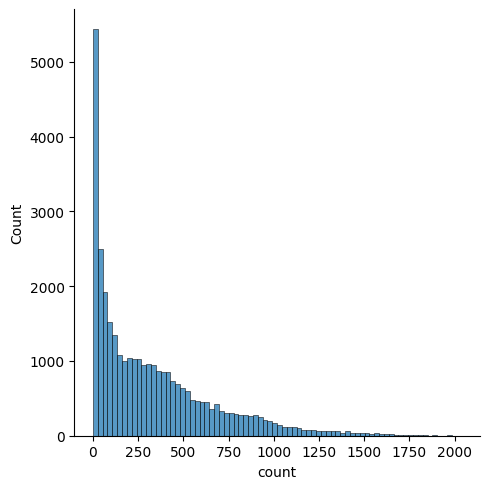

In [ ]:
# 자전거 대여량의 값 분포를 알아보자!
sns.displot(bike_df['count'])

<Axes: >

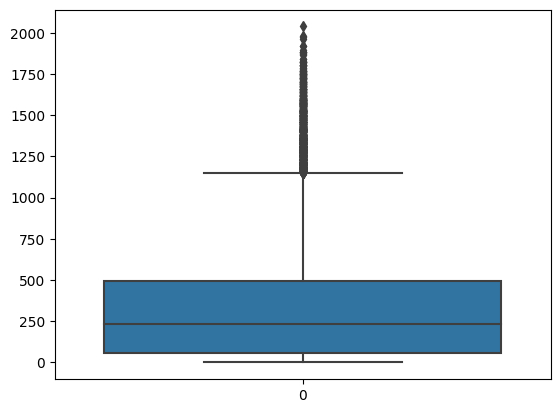

In [ ]:
sns.boxplot(bike_df['count'])

**각 변수별 대여량과의 관계를 알아보자.**

<Axes: xlabel='feels_like', ylabel='count'>

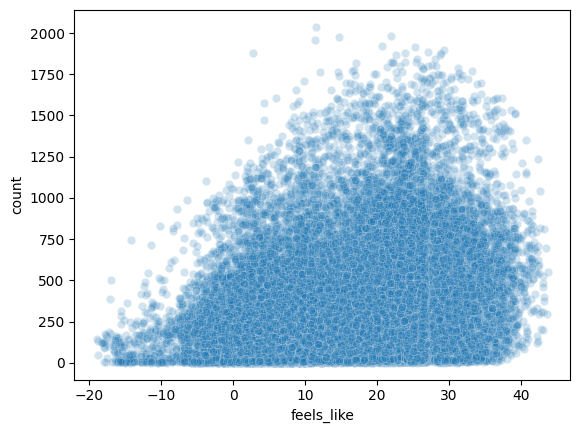

In [ ]:
sns.scatterplot(x='feels_like',y='count',data=bike_df, alpha=0.2)

In [ ]:
#sns.lineplot(x='feels_like',y='count',data=bike_df)

<Axes: xlabel='pressure', ylabel='count'>

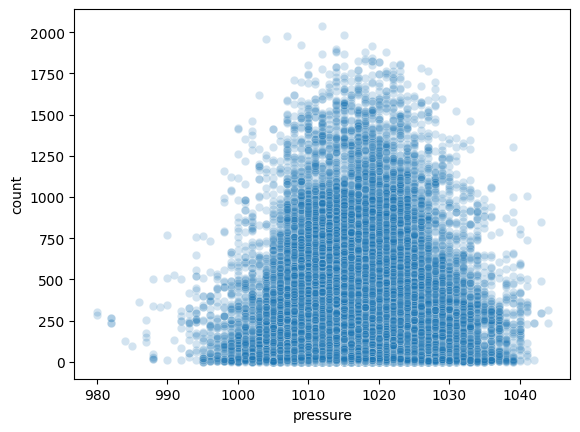

In [ ]:
sns.scatterplot(x='pressure',y='count', data=bike_df, alpha=0.2)

<Axes: xlabel='wind_speed', ylabel='count'>

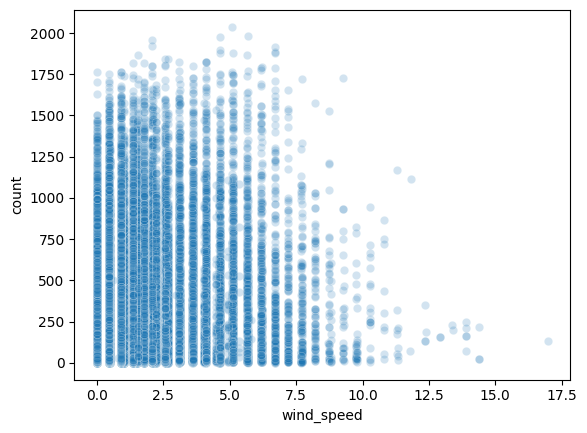

In [ ]:
sns.scatterplot(x='wind_speed',y='count',data=bike_df, alpha=0.2)

<Axes: xlabel='wind_deg', ylabel='count'>

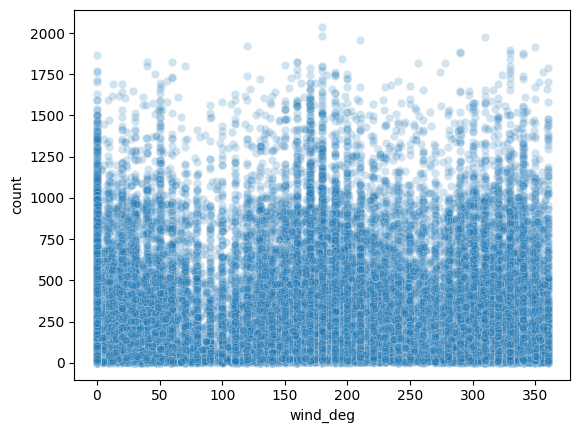

In [ ]:
sns.scatterplot(x='wind_deg',y='count',data=bike_df,alpha=0.2)

<Axes: xlabel='weather_main', ylabel='count'>

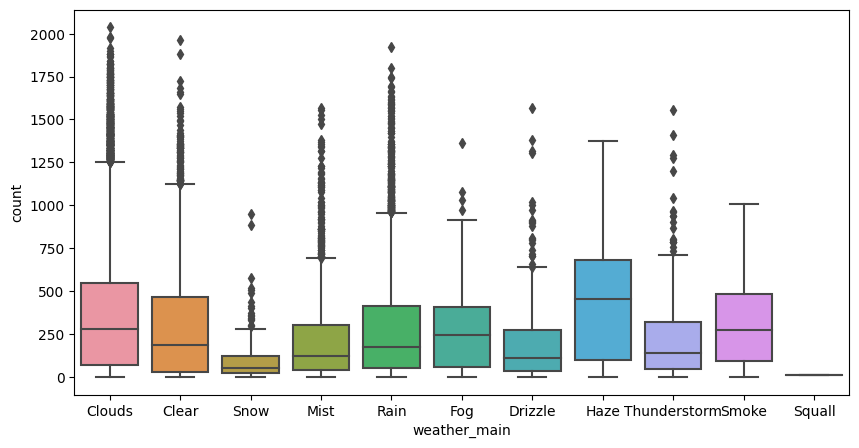

In [ ]:
plt.figure(figsize=(10,5))
sns.boxplot(x='weather_main',y='count',data=bike_df)

**03. 결측치 처리**

In [ ]:
bike_df.isna().sum()

datetime            0
count               0
holiday             0
workingday          0
temp                0
feels_like          0
temp_min            0
temp_max            0
pressure            0
humidity            0
wind_speed          0
wind_deg            0
rain_1h         26608
snow_1h         33053
clouds_all          0
weather_main        0
dtype: int64

In [ ]:
bike_df.isna().mean()

datetime        0.000000
count           0.000000
holiday         0.000000
workingday      0.000000
temp            0.000000
feels_like      0.000000
temp_min        0.000000
temp_max        0.000000
pressure        0.000000
humidity        0.000000
wind_speed      0.000000
wind_deg        0.000000
rain_1h         0.797148
snow_1h         0.990233
clouds_all      0.000000
weather_main    0.000000
dtype: float64

In [ ]:
bike_df['rain_1h'] = bike_df['rain_1h'].fillna(0)

In [ ]:
bike_df = bike_df.fillna(0)

In [ ]:
bike_df.head()

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
0,2018-01-01 0:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds
1,2018-01-01 1:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear
2,2018-01-01 2:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear
3,2018-01-01 3:00,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,0.0,0.0,1,Clear
4,2018-01-01 4:00,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,0.0,0.0,1,Clear


In [ ]:
bike_df.isna().mean()

datetime        0.0
count           0.0
holiday         0.0
workingday      0.0
temp            0.0
feels_like      0.0
temp_min        0.0
temp_max        0.0
pressure        0.0
humidity        0.0
wind_speed      0.0
wind_deg        0.0
rain_1h         0.0
snow_1h         0.0
clouds_all      0.0
weather_main    0.0
dtype: float64

**시간 데이터 변환 - 필요한 정보 추출하기**

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33379 entries, 0 to 33378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   datetime      33379 non-null  object 
 1   count         33379 non-null  int64  
 2   holiday       33379 non-null  int64  
 3   workingday    33379 non-null  int64  
 4   temp          33379 non-null  float64
 5   feels_like    33379 non-null  float64
 6   temp_min      33379 non-null  float64
 7   temp_max      33379 non-null  float64
 8   pressure      33379 non-null  int64  
 9   humidity      33379 non-null  int64  
 10  wind_speed    33379 non-null  float64
 11  wind_deg      33379 non-null  int64  
 12  rain_1h       33379 non-null  float64
 13  snow_1h       33379 non-null  float64
 14  clouds_all    33379 non-null  int64  
 15  weather_main  33379 non-null  object 
dtypes: float64(7), int64(7), object(2)
memory usage: 4.1+ MB


In [ ]:
bike_df['datetime'] = pd.to_datetime(bike_df['datetime'])

In [ ]:
bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33379 entries, 0 to 33378
Data columns (total 16 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   datetime      33379 non-null  datetime64[ns]
 1   count         33379 non-null  int64         
 2   holiday       33379 non-null  int64         
 3   workingday    33379 non-null  int64         
 4   temp          33379 non-null  float64       
 5   feels_like    33379 non-null  float64       
 6   temp_min      33379 non-null  float64       
 7   temp_max      33379 non-null  float64       
 8   pressure      33379 non-null  int64         
 9   humidity      33379 non-null  int64         
 10  wind_speed    33379 non-null  float64       
 11  wind_deg      33379 non-null  int64         
 12  rain_1h       33379 non-null  float64       
 13  snow_1h       33379 non-null  float64       
 14  clouds_all    33379 non-null  int64         
 15  weather_main  33379 non-null  object

In [ ]:
bike_df.head(3)

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main
0,2018-01-01 00:00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds
1,2018-01-01 01:00:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear
2,2018-01-01 02:00:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear


In [ ]:
# lst = []
# for i in range(len(bike_df['datetime'])):
#     lst.append(bike_df['datetime'][i][:4])
# print(lst)

In [ ]:
bike_df['year'] = bike_df['datetime'].dt.year

In [ ]:
bike_df['month'] = bike_df['datetime'].dt.month

In [ ]:
bike_df['hour'] = bike_df['datetime'].dt.hour

In [ ]:
bike_df.head(3)

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,year,month,hour
0,2018-01-01 00:00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds,2018,1,0
1,2018-01-01 01:00:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear,2018,1,1
2,2018-01-01 02:00:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear,2018,1,2


In [ ]:
# 시간 단위를 일 단위로 변경
bike_df['datetime'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
33374    31
33375    31
33376    31
33377    31
33378    31
Name: datetime, Length: 33379, dtype: int64

In [ ]:
bike_df['datetime'].dt.date

0        2018-01-01
1        2018-01-01
2        2018-01-01
3        2018-01-01
4        2018-01-01
            ...    
33374    2021-08-31
33375    2021-08-31
33376    2021-08-31
33377    2021-08-31
33378    2021-08-31
Name: datetime, Length: 33379, dtype: object

In [ ]:
bike_df['date'] = bike_df['datetime'].dt.date

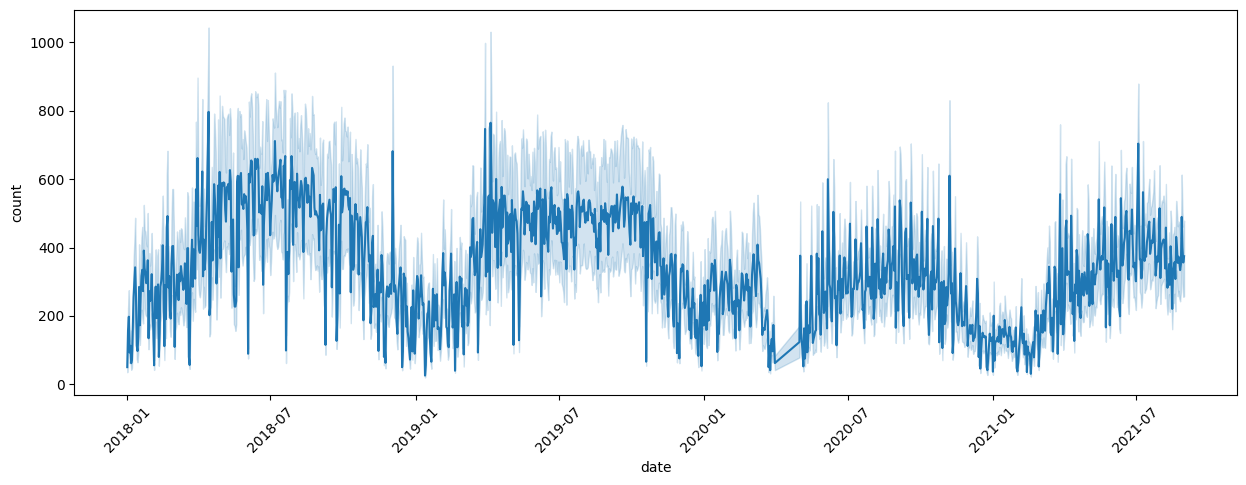

In [ ]:
plt.figure(figsize=(15,5))
sns.lineplot(x='date',y='count',data=bike_df)
plt.xticks(rotation=45)
plt.show()

In [ ]:
bike_df[bike_df['year'] == 2019]

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,year,month,hour,date
9442,2019-01-01 00:00:00,60,1,0,8.23,8.23,6.97,9.07,1016,91,0.00,0,0.38,0.0,90,Rain,2019,1,0,2019-01-01
9443,2019-01-01 00:00:00,60,1,0,8.23,8.23,6.97,9.07,1016,91,0.00,0,0.38,0.0,90,Mist,2019,1,0,2019-01-01
9444,2019-01-01 01:00:00,107,1,0,8.19,8.19,7.33,9.07,1014,91,0.00,0,0.25,0.0,90,Drizzle,2019,1,1,2019-01-01
9445,2019-01-01 01:00:00,107,1,0,8.19,8.19,7.33,9.07,1014,91,0.00,0,0.25,0.0,90,Mist,2019,1,1,2019-01-01
9446,2019-01-01 01:00:00,107,1,0,8.19,8.19,7.33,9.07,1014,91,0.00,0,0.25,0.0,90,Rain,2019,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18714,2019-12-31 19:00:00,180,0,1,11.17,9.83,9.97,12.03,1003,57,2.24,206,0.00,0.0,75,Clouds,2019,12,19,2019-12-31
18715,2019-12-31 20:00:00,135,0,1,11.66,10.24,10.84,12.23,1003,52,2.24,277,0.00,0.0,75,Clouds,2019,12,20,2019-12-31
18716,2019-12-31 21:00:00,111,0,1,11.48,9.94,10.23,12.17,1003,48,2.24,242,0.00,0.0,40,Clouds,2019,12,21,2019-12-31
18717,2019-12-31 22:00:00,80,0,1,11.01,9.47,9.67,11.62,1004,50,0.89,297,0.00,0.0,75,Clouds,2019,12,22,2019-12-31


In [ ]:
# 2019년 월별 자전거 대여량
bike_df[bike_df['year'] == 2019].groupby('month').mean()['count']

<ipython-input-41-4056c1942506>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df[bike_df['year'] == 2019].groupby('month').mean()['count']


month
1     193.368862
2     221.857718
3     326.564456
4     482.931694
5     438.027848
6     478.480053
7     472.745785
8     481.267366
9     500.862069
10    446.279070
11    307.295393
12    213.148886
Name: count, dtype: float64

In [ ]:
# 2020년 월별 자전거 대여량
bike_df[bike_df['year'] == 2020].groupby('month').mean()['count']

<ipython-input-42-944e449f2340>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df[bike_df['year'] == 2020].groupby('month').mean()['count']


month
1     260.445997
2     255.894320
3     217.135241
5     196.581064
6     290.900937
7     299.811688
8     331.528809
9     338.876478
10    293.640777
11    240.507324
12    138.993540
Name: count, dtype: float64

In [ ]:
# 2021년 월별 자전거 대여량
bike_df[bike_df['year'] == 2021].groupby('month').mean()['count']

<ipython-input-43-da8ccfc0c9a3>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  bike_df[bike_df['year'] == 2021].groupby('month').mean()['count']


month
1    129.363525
2    113.081115
3    222.504988
4    299.140921
5    337.126797
6    381.195155
7    418.996011
8    362.574803
Name: count, dtype: float64

**05. 시간 데이터 변환 - 새로운 변수 만들기**

In [ ]:
def covid(date):
    if date < '2020-04-01':
        return 'precovid'
    elif date < '2021-04-01':
        return 'covid'
    else:
        return 'postcovid'

In [ ]:
#covid(bike_df['date'])

In [ ]:
#bike_df['date'] < '2020-04-01'

In [ ]:
def covid(date):
    if str(date) < '2020-04-01':
        return 'precovid'
    elif str(date) < '2021-04-01':
        return 'covid'
    else:
        return 'postcovid'

In [ ]:
covid(bike_df['date'])

'precovid'

In [ ]:
bike_df['date'].apply(covid)

0         precovid
1         precovid
2         precovid
3         precovid
4         precovid
           ...    
33374    postcovid
33375    postcovid
33376    postcovid
33377    postcovid
33378    postcovid
Name: date, Length: 33379, dtype: object

In [ ]:
#bike_df['covid'] = bike_df['date'].apply(lambda x : 'precovid' if x < '2020-04-01' else 'covid' if x < '2021-04-01' else 'postcovid')

In [ ]:
bike_df['covid'] = bike_df['date'].apply(lambda x : 'precovid' if str(x) < '2020-04-01' else 'covid' if str(x) < '2021-04-01' else 'postcovid')

In [ ]:
bike_df['covid'] = bike_df['date'].apply(lambda date: 'precovid' if str(date) < '2020-04-01' else 'covid' if str(date) < '2021-04-01' else 'postcovid' )

In [ ]:
bike_df['season'] = bike_df['month'].apply(lambda x : 'winter' if x== 12 else 'fall' if x >= 9 else 'summer' if x >= 6  else 'spring' if x >= 3 else 'winter')

In [ ]:
bike_df[['month','season']].iloc[11133]

month          3
season    spring
Name: 11133, dtype: object

In [ ]:
#decision tree로 묶어줄 수 있는 건 묶어주는 게 좋다.
bike_df['day_night'] = bike_df['hour'].apply(lambda x: 'night' if x >= 21 else 'late evening' if x >= 19 else 'early evening' if x >= 17 else 'late afternoon' if x >= 16
                                                else 'early afternnon' if x >= 13 else 'late morning' if x >= 11 else 'early morning' if x >= 5 else 'night')

In [ ]:
bike_df.head(3)

,datetime,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,...,snow_1h,clouds_all,weather_main,year,month,hour,date,covid,season,day_night
0,2018-01-01 00:00:00,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,...,0.0,20,Clouds,2018,1,0,2018-01-01,precovid,winter,night
1,2018-01-01 01:00:00,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,...,0.0,1,Clear,2018,1,1,2018-01-01,precovid,winter,night
2,2018-01-01 02:00:00,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,...,0.0,1,Clear,2018,1,2,2018-01-01,precovid,winter,night


In [ ]:
bike_df.drop(['datetime','month','date'], axis=1, inplace=True)

In [ ]:
bike_df.head(3)

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,year,hour,covid,season,day_night
0,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds,2018,0,precovid,winter,night
1,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear,2018,1,precovid,winter,night
2,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear,2018,2,precovid,winter,night


**알 수 있는 것**

* 대여량이 높아질수록 Count수는 처음에 크게 감소하다가 점점 조금씩 감소하는 경향을 *보인다*.

* 분포는 연속적이며, 동떨어진 데이터는 없는 것으로 파악.


# 2.데이터 분석

## 2-1. 문제 정의
사람들이 이용하는 자전거 대여량(count)의 현황과 어떨 때에 대여량이 높은지 궁금해요!

**문제 정의의 구체화**

* 위에 말하는 사람들이란 누구인가?
* 대여량이란 무엇을 기준으로 계산되어지는가?
* 그 현황이란 대체 언제부터 언제까지를 말하는가?
* 주 weekly 단위인가? 일 daily 단위인가?


**배경과 목적을 고려하여 새로 정의한 문제 정의의 예**

최근 3년(2021년 기준)간 평일의 자전거 대여량과 주말의 자전거 대여량을 구분하여 기후, 날씨, 계절, 날짜/시간 별로 어떻게 대여량이 영향을 받는가?

## 2-2. 가설 설정
1. 주말의 자전거 대여량이 평일의 자전거 대여량보다 기후, 날씨의 영향을 크게 받을 것이다.
2. 평일의 자전거 대여량은 계절의 영향을 상대적으로 크게 받을 것이고, 주말의 자전거 대여량이 계절의 영향을 상대적으로 적게 받을 것이다.
3. 코로나 팬데믹 시기에는 평일 주말 관계없이 자전거 대여량은 거의 없을 것이다.
4. 전제 자전거 대여량은 꾸준히 증가 추세를 보일 것이다.(코로나 팬데믹 시기 제외)


## 2-3. 실험 설계
가설을 어떻게 검증할 것인가?

제일 먼저 고려할 사항은 **'꼭 쿼리나 코딩을 통해 검증해야 하는가?'** 이다

검증의 방법은 아래와 같이 다양하기 때문이다.

* DB & SQL : 정확도가 중요한 정보  ( 예 : 사용자 정보, 구매 기록, 결제 정보 등 )
* Amplitude, Mixpanel, GA : 다양한 행동 데이터 ( 예 : 클릭, 페이지 랜딩, 콘텐츠 조회, 단순 정보 입력, 열기/ 닫기 )
* GA : 이 외의 마케팅 정보 ( 예 : 유입 경로 )
* Excel, 구글 스프레드 시트 ( 예 : 차트, 통계 분석 등 )
* 그 외 전화/이메일 조사, 설문/인터뷰, UX 분석 도구 등

## 2-4. 가설 검정

### 1) 가설 1 검정

**주말의 자전거 대여량이 평일의 자전거 대여량보다 기후, 날씨의 영향을 크게 받을 것이다.**

In [ ]:
bike_df.head()

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,year,hour,covid,season,day_night
0,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds,2018,0,precovid,winter,night
1,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear,2018,1,precovid,winter,night
2,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear,2018,2,precovid,winter,night
3,9,1,0,-8.10,-14.32,-9.36,-7.89,1031,49,4.1,310,0.0,0.0,1,Clear,2018,3,precovid,winter,night
4,12,1,0,-8.19,-14.43,-9.46,-8.09,1031,49,4.1,330,0.0,0.0,1,Clear,2018,4,precovid,winter,night


In [ ]:
#주말 자전거 대여량
bike_df_holiday = bike_df.loc[bike_df['holiday']==1]
bike_df_holiday.head(3)

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,year,hour,covid,season,day_night
0,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds,2018,0,precovid,winter,night
1,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear,2018,1,precovid,winter,night
2,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear,2018,2,precovid,winter,night


In [ ]:
#평일 자전거 대여량
bike_df_workingday = bike_df.loc[bike_df['holiday']==0]
bike_df_workingday.head(3)

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,year,hour,covid,season,day_night
24,3,0,1,-6.14,-11.47,-7.16,-6.09,1032,38,3.6,310,0.0,0.0,1,Clear,2018,0,precovid,winter,night
25,6,0,1,-6.95,-13.95,-8.03,-6.84,1033,37,7.7,300,0.0,0.0,1,Clear,2018,1,precovid,winter,night
26,4,0,1,-8.02,-15.02,-9.03,-7.94,1034,41,6.7,300,0.0,0.0,1,Clear,2018,2,precovid,winter,night


<ipython-input-62-4f7b8c4c05ca>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bike_df_workingday.corr()[['count']],annot=True,cmap='YlOrRd')
<ipython-input-62-4f7b8c4c05ca>:13: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(bike_df_holiday.corr()[['count']],annot=True,cmap='YlOrRd')


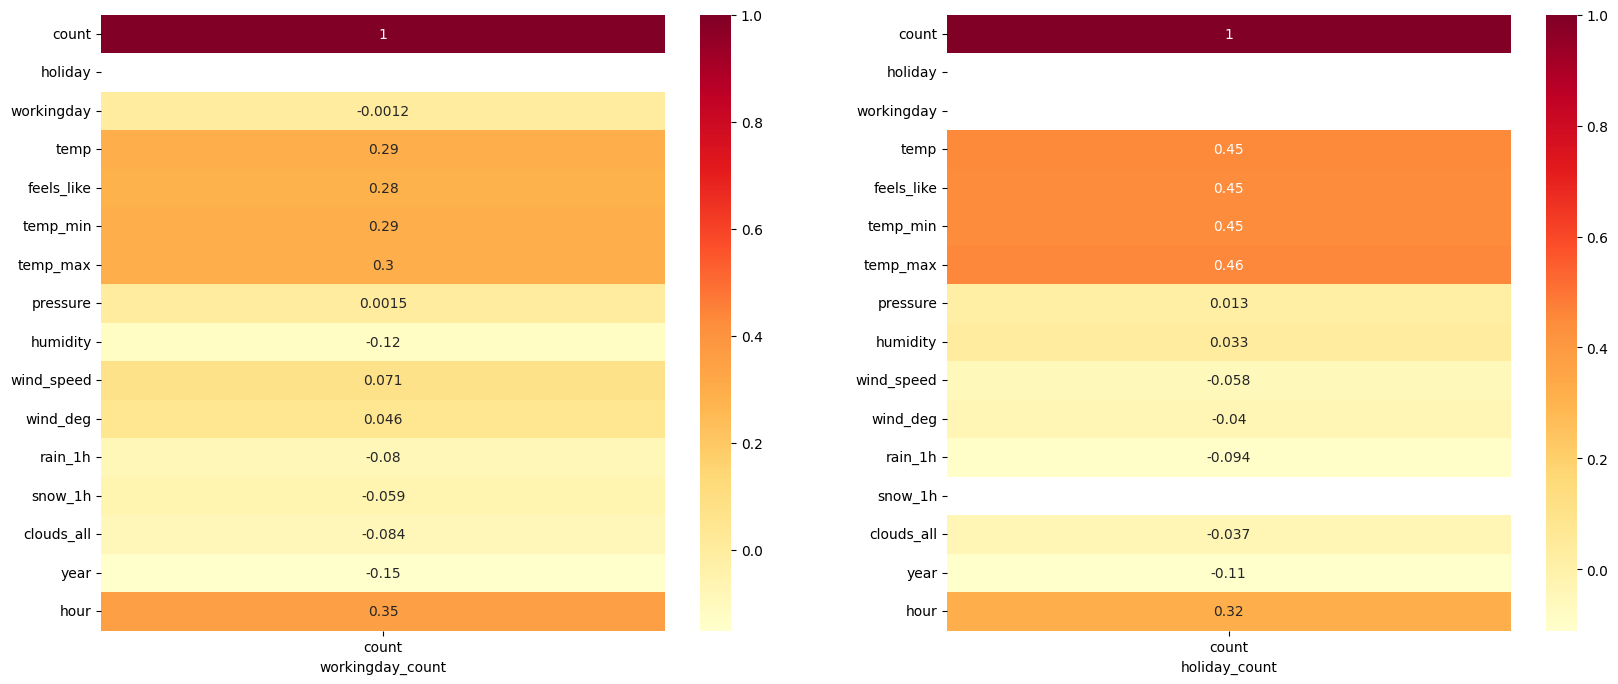

In [ ]:
# 2x2 그리드 생성, 첫 번째 서브플롯 선택
plt.figure(figsize=(20,8))
plt.subplot(1, 2, 1)

# 여기에 첫 번째 그래프를 그리는 코드 추가
sns.heatmap(bike_df_workingday.corr()[['count']],annot=True,cmap='YlOrRd')
plt.xlabel('workingday_count')

# 두 번째 서브플롯 선택
plt.subplot(1, 2, 2)

# 여기에 두 번째 그래프를 그리는 코드 추가
sns.heatmap(bike_df_holiday.corr()[['count']],annot=True,cmap='YlOrRd')
plt.xlabel('holiday_count')
plt.show()

* 온도 데이터(**'temp'**,  **'feels_like'**,  **'temp_min'**,  **'temp_max'**) 들에 대해서 상관계수가 높게 나타난다. 특히 주말에 더 두드러지게 나타난다.
* 0.4 이상의 상관계수면 어느정도 상관이 있다고 판단.

In [ ]:
fig = px.scatter(bike_df_holiday, x="temp", y="count",
                 color="humidity", # Species 열의 값에 따라서 색깔 표현
                 #size='petal_length', # petal_length 에 따라 크기를 변화
                 #hover_data=['petal_width'], # 참고할 데이터 추가
                 title='temp-count Plot' # 그래프 타이틀 지정
                )
fig.show()

In [ ]:
fig = px.scatter(bike_df_holiday, x="temp", y="count",
                 color="clouds_all", # Species 열의 값에 따라서 색깔 표현
                 #size='petal_length', # petal_length 에 따라 크기를 변화
                 #hover_data=['petal_width'], # 참고할 데이터 추가
                 title='temp-count Plot' # 그래프 타이틀 지정
                )
fig.show()

In [ ]:
fig = px.scatter(bike_df_holiday, x="temp", y="count",
                 color="hour", # Species 열의 값에 따라서 색깔 표현
                 #size='petal_length', # petal_length 에 따라 크기를 변화
                 #hover_data=['petal_width'], # 참고할 데이터 추가
                 title='temp-count Plot' # 그래프 타이틀 지정
                )
fig.show()

* count와 나머지 변수들('temp', 'feels_like', 'temp_min', 'temp_max', 'count')과의 관계를 주목하자!
* 기온(temp)이 낮은 구간은 대여량(count) 분포범위가 낮음( 0 ~ 300 정도 )
* 기온(temp)이 높은 구간은 대여량(count) 분포범위가 높음( 0 ~ 1300 정도, 심지어 1500이 넘는 데이터도 있음. )

**가설1 검정**
* '주말의 자전거 대여량이 평일의 자전거 대여량보다 기온, 날씨의 영향을 크게 받을 것이다.' 는 참으로 볼 수 있겠다.


**Q.어떻게 하면 이용자 수(대여량(count))를 늘릴 수 있을까?**

count 와 temp 의 산점도를 주목해보자!

*** 기온이 높은 구간(여름)**

대여량이 낮은 분포의 경우(0~300) 습도(humidity), 구름 낌 정도(clouds_all)가 매우 안 좋은 날인 경우가 많다. 따라서 이들은 잠시 멀리하고, 날씨가 좋았을 때의 분포 중 (500 이상) 대여량이 낮은 날을 주목해보자! 이 때, 대여량 할인과 같은 이벤트를 통해 대여량을 끌어올릴 수 있을 것을 보인다.

*** 기온이 낮은 구간(겨울)**

대여량의 분포가 최대값이 약 300정도로 작기 때문에 프로모션 이벤트와 같은 것이 확실히 여름보다는 효과를 거두기 어려울 것으로 보인다.

### 2) 가설 2 검정

**평일의 자전거 대여량은 계절의 영향을 상대적으로 크게 받을 것이고, 주말의 자전거 대여량이 계절의 영향을 상대적으로 적게 받을 것이다.**

In [ ]:
#평일의 자전거 대여량
fig = px.scatter(bike_df_workingday, x="temp", y="count",  opacity=0.2,
                 color="season", # Species 열의 값에 따라서 색깔 표현
                 #size='petal_length', # petal_length 에 따라 크기를 변화
                 #hover_data=['petal_width'], # 참고할 데이터 추가
                 title='temp-count Plot' # 그래프 타이틀 지정
                )
fig.update_yaxes(range=[0, bike_df_workingday['count'].max() + 100])  # Adjust the range as needed

fig.show()

In [ ]:
#주말의 자전거 대여량
fig = px.scatter(bike_df_holiday, x="temp", y="count",
                 color="season", # Species 열의 값에 따라서 색깔 표현
                 #size='petal_length', # petal_length 에 따라 크기를 변화
                 #hover_data=['petal_width'], # 참고할 데이터 추가
                 title='temp-count Plot' # 그래프 타이틀 지정
                )
# Set the y-axis range
fig.update_yaxes(range=[0, bike_df_workingday['count'].max() + 100])  # Adjust the range as needed

fig.show()

**가설 검정**
* '평일의 자전거 대여량은 계절의 영향을 상대적으로 크게 받을 것이고, 주말의 자전거 대여량이 계절의 영향을 상대적으로 적게 받을 것이다.' 는 그래프상으로 봤을 때 참 or 거짓 판단을 하기가 애매하다.
* 추가적으로, 당연히 주말의 자전거 대여량이 많을 줄 알았는 데, 평일의 대여량이 기온(temp) 전체적으로 높게 나온다는 사실을 알았다. 이는 평일 직장인이나 사업가, 자영업인들이 출퇴근 혹은 근거리 이동 시 많이 사용한다는 사실을 알 수 있다.

**Q.어떻게 하면 이용자 수(대여량(count))를 늘릴 수 있을까?**

2가지 전략을 생각해볼 수 있다.

*** 직장인들을 겨냥한 홍보활동**

겨울을 제외한 봄, 여름, 가을에 대여량의 차이가 두드러지게 나타난다. 물론 날씨 등의 외부요인도 있겠지만, 날씨의 여건이 좋지만 자전거 이용의 유용성을 몰라서 이용하지 않는 직장인들을 위한 홍보활동이 대여량 증가에 효과를 줄 여지가 있다.

*** 상대적으로 저조한 주말 이용자들을 겨냥한 홍보활동**

주말 이용자들은 위의 방법과 다르게 접근할 필요가 있다. 이들은 취미로 자전거를 이용하는 것으로, 이런 사람들을 늘리기 위해서는 단순 홍보활동이 아니라 혜택을 제시하는 프로모션 활동이 있는 것이 좋다. 예를 들어, 단체 대여 시 할인과 같은 것을 말한다.



### 3) 가설 3 검정

**코로나 팬데믹 시기에는 평일 주말 관계없이 자전거 대여량은 거의 없을 것이다.**

In [ ]:
bike_df_covid = bike_df.loc[bike_df['covid']=='covid']
print(bike_df_covid.shape)
bike_df_covid.head(3)

(8587, 20)


,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,year,hour,covid,season,day_night
21032,9,0,1,14.41,14.31,13.58,15.38,1004,92,0.89,148,0.68,0.0,90,Rain,2020,0,covid,spring,night
21033,0,0,1,14.44,14.32,13.44,14.95,1005,91,0.89,201,0.51,0.0,90,Rain,2020,1,covid,spring,night
21034,4,0,1,14.35,14.22,13.44,14.95,1006,91,1.50,190,0.42,0.0,90,Rain,2020,2,covid,spring,night


In [ ]:
import plotly.express as px

# Assuming bike_df_workingday is your DataFrame

fig = px.histogram(bike_df_covid,
                   x="count",
                   nbins=30,  # Adjust the number of bins as needed
                   title='Histogram of Bike Counts'
                  )

# Set the y-axis range
fig.update_yaxes(range=[0, 1500])  # Adjust the range as needed

fig.show()

**가설 검정**
* 대여량이 없는 것이 아니며, 심지어 1600 이상의 대여량을 기록한 때도 있었다. 따라서 '코로나 팬데믹 시기에는 평일 주말 관계없이 자전거 대여량은 거의 없을 것이다.' 는 거짓이다.

### 4) 가설 4 검정

**전제 자전거 대여량은 꾸준히 증가 추세를 보일 것이다.(코로나 팬데믹 시기 제외)**

# 4.번외: 예측 모델 구축

## 4-1. 더미 변수 만들기

In [ ]:
bike_df.head(3)

,count,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,rain_1h,snow_1h,clouds_all,weather_main,year,hour,covid,season,day_night
0,34,1,0,-7.17,-12.73,-8.56,-7.09,1030,53,3.6,310,0.0,0.0,20,Clouds,2018,0,precovid,winter,night
1,49,1,0,-7.35,-13.81,-9.03,-7.15,1030,49,4.6,310,0.0,0.0,1,Clear,2018,1,precovid,winter,night
2,37,1,0,-7.88,-14.05,-9.03,-7.69,1031,52,4.1,310,0.0,0.0,1,Clear,2018,2,precovid,winter,night


In [ ]:
bike_df.nunique()

count           1623
holiday            2
workingday         2
temp            4090
feels_like      4858
temp_min        1913
temp_max        1736
pressure          63
humidity          86
wind_speed        79
wind_deg         361
rain_1h          523
snow_1h           78
clouds_all        25
weather_main      11
year               4
hour              24
covid              3
season             4
day_night          7
dtype: int64

In [ ]:
for i in ['weather_main','hour','covid','season','day_night']:
    print(i, bike_df[i].nunique())

weather_main 11
hour 24
covid 3
season 4
day_night 7


In [ ]:
bike_df['weather_main'].unique()

array(['Clouds', 'Clear', 'Snow', 'Mist', 'Rain', 'Fog', 'Drizzle',
       'Haze', 'Thunderstorm', 'Smoke', 'Squall'], dtype=object)

In [ ]:
bike_df = pd.get_dummies(bike_df, columns=['weather_main','hour','covid','season','day_night'])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X = bike_df.drop('count',axis=1)
y = bike_df['count']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(bike_df.drop('count',axis=1),bike_df['count'],test_size=0.3,random_state=100)

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dt = DecisionTreeRegressor(random_state=100)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(random_state=100)

In [ ]:
pred_1 = dt.predict(X_test)

In [ ]:
y_test

25087     503
24927    1050
3425       67
14027     321
8986       62
         ... 
18521       0
13152      28
6759     1569
20699      75
14253     125
Name: count, Length: 10014, dtype: int64

In [ ]:
pred_1

array([ 474.,  754.,  510., ..., 1452.,  468.,  125.])

<Axes: xlabel='count'>

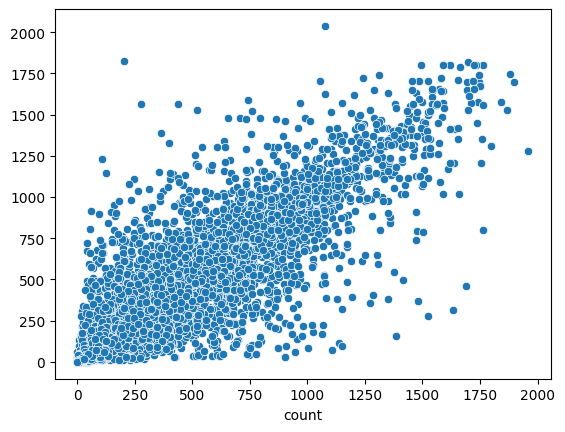

In [ ]:
sns.scatterplot(x=y_test, y=pred_1)

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test,pred_1,squared=False)

156.58963777810052

## 4-2. 리니어 리그레션과 비교해보자

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred_2 = lr.predict(X_test)

<Axes: xlabel='count'>

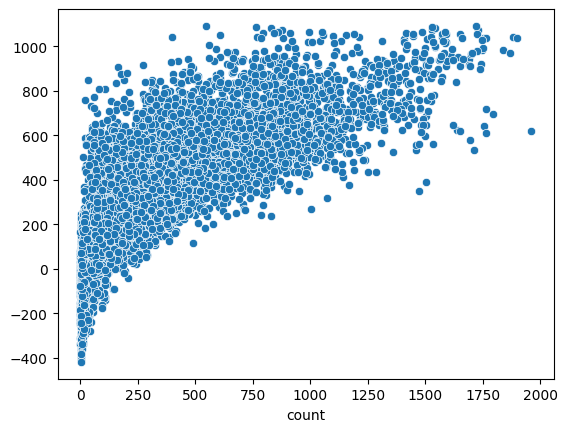

In [ ]:
sns.scatterplot(x=y_test,y=pred_2)

In [ ]:
mean_squared_error(y_test,pred_2,squared=False)

206.04450974570258

In [ ]:
lr.fit(X_train,np.log(y_train+1))

LinearRegression()

In [ ]:
pred_3 = lr.predict(X_test)

In [ ]:
pred_3 = np.exp(pred_3) - 1

In [ ]:
mean_squared_error(y_test,pred_3, squared = False)

204.45806070355707

## 4-3. 오버피팅 극복해보기

하이퍼 파라미터 튜닝

In [ ]:
dt= DecisionTreeRegressor(random_state=100, max_depth = 50, min_samples_leaf = 30)

In [ ]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=50, min_samples_leaf=30, random_state=100)

In [ ]:
pred_4 = dt.predict(X_test)

In [ ]:
mean_squared_error(y_test,pred_4,squared=False)

138.70306111768673

트리 플랏

In [ ]:
from sklearn.tree import plot_tree

[Text(0.6628034667729561, 0.9782608695652174, 'x[62] <= 0.5\nsquared_error = 113371.392\nsamples = 23365\nvalue = 333.53'),
 Text(0.4036102339769888, 0.9347826086956522, 'x[5] <= 15.435\nsquared_error = 118769.156\nsamples = 15590\nvalue = 455.33'),
 Text(0.26133513803333497, 0.8913043478260869, 'x[30] <= 0.5\nsquared_error = 72173.828\nsamples = 7590\nvalue = 329.343'),
 Text(0.21738958634393063, 0.8478260869565217, 'x[49] <= 0.5\nsquared_error = 70837.944\nsamples = 7067\nvalue = 350.684'),
 Text(0.16890771192563928, 0.8043478260869565, 'x[56] <= 0.5\nsquared_error = 77232.509\nsamples = 5244\nvalue = 389.62'),
 Text(0.1485335584647791, 0.7608695652173914, 'x[33] <= 0.5\nsquared_error = 66028.257\nsamples = 4654\nvalue = 363.715'),
 Text(0.12385265626530813, 0.717391304347826, 'x[31] <= 0.5\nsquared_error = 49527.124\nsamples = 4285\nvalue = 341.896'),
 Text(0.08938259282845107, 0.6739130434782609, 'x[55] <= 0.5\nsquared_error = 49247.866\nsamples = 3910\nvalue = 360.503'),
 Text(0.0

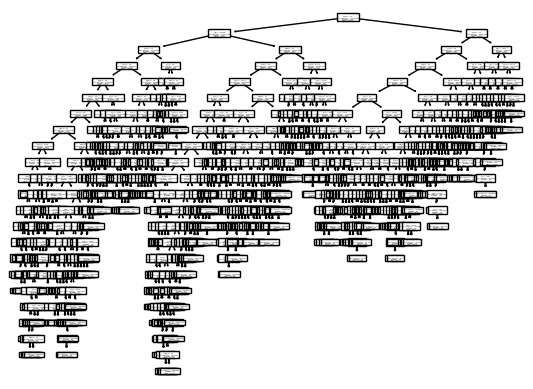

In [ ]:
plot_tree(dt)

In [ ]:
X_train

,holiday,workingday,temp,feels_like,temp_min,temp_max,pressure,humidity,wind_speed,wind_deg,...,season_spring,season_summer,season_winter,day_night_earlt evening,day_night_early afternnon,day_night_early morning,day_night_late afternoon,day_night_late evening,day_night_late morning,day_night_night
27439,0,0,7.90,6.54,6.74,8.28,1014,37,2.24,342,...,0,0,1,0,0,0,0,0,0,1
5754,0,1,23.81,24.54,21.97,23.85,1017,88,2.57,360,...,0,1,0,0,0,1,0,0,0,0
23109,0,1,23.47,24.30,22.23,24.26,1016,93,0.45,277,...,0,1,0,0,0,1,0,0,0,0
24332,0,1,23.89,24.74,22.97,24.31,1023,92,1.00,30,...,0,0,0,0,0,0,0,0,0,1
100,0,1,-7.00,-14.00,-7.46,-6.84,1011,44,6.70,300,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16734,0,1,15.15,15.04,13.58,16.04,1003,89,0.45,321,...,0,0,0,1,0,0,0,0,0,0
16304,0,0,26.50,26.50,25.79,27.17,1016,80,0.45,190,...,0,0,0,0,0,0,0,0,0,1
79,0,1,-3.35,-7.62,-4.16,-2.94,1013,85,3.10,360,...,0,0,1,0,0,1,0,0,0,0
12119,0,0,17.54,17.67,16.78,17.96,1016,89,0.89,216,...,1,0,0,0,0,1,0,0,0,0


In [ ]:
X_train.columns

Index(['holiday', 'workingday', 'temp', 'feels_like', 'temp_min', 'temp_max',
       'pressure', 'humidity', 'wind_speed', 'wind_deg', 'rain_1h', 'snow_1h',
       'clouds_all', 'year', 'weather_main_Clear', 'weather_main_Clouds',
       'weather_main_Drizzle', 'weather_main_Fog', 'weather_main_Haze',
       'weather_main_Mist', 'weather_main_Rain', 'weather_main_Smoke',
       'weather_main_Snow', 'weather_main_Squall', 'weather_main_Thunderstorm',
       'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'covid_covid',
       'covid_postcovid', 'covid_precovid', 'season_fall', 'season_spring',
       'season_summer', 'season_winter', 'day_night_earlt evening',
       'day_night_early afternnon', 'day_night_early morning',
       'day_night_late afternoon', 'day_ni

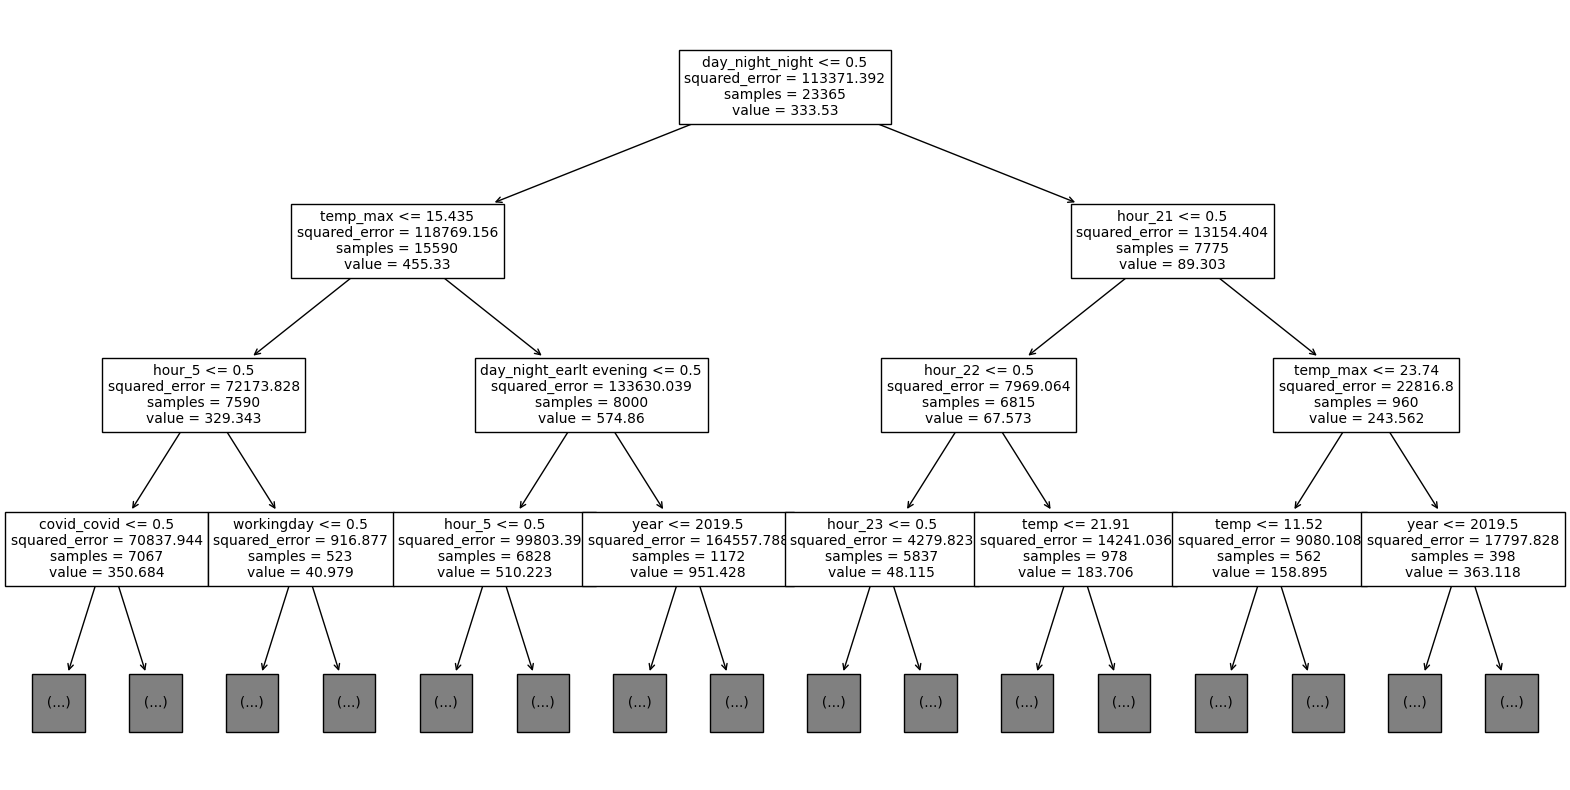

In [ ]:
plt.figure(figsize=(20,10))
plot_tree(dt,max_depth=3, fontsize=10,feature_names=X_train.columns)
plt.show()